# Boilerplate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load data

In [141]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [142]:
# smaller sample for development
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

In [143]:
x_train.shape, y_train.shape, x_train.min(), x_train.max()

((5000, 28, 28), (5000,), 0, 255)

In [144]:
x_test.shape, y_test.shape

((1000, 28, 28), (1000,))

In [145]:
# Pre-processing

from keras.utils import to_categorical

# Normalize pixel values from 0-255 to 0-1
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [135]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [129]:
y_train.shape, y_test.shape

((5000, 10), (1000, 10))

In [130]:
def display_batch(x, y, title=''):
    rows, cols = int(np.ceil(len(x) / 8)), 8
    
    fig, axes = plt.subplots(rows, cols, squeeze=False, figsize=(cols * 2, rows * 2))
    axes = axes.reshape(rows * cols)
    
    fig.suptitle(title, y=1.08)
    
    for axis in axes:
        axis.set_axis_off()
        
    for image, label, axis in zip(x, y, axes):
        axis.imshow(image, cmap='gray')
        axis.set_title(label.argmax())

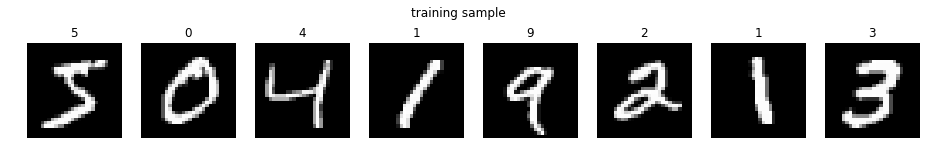

In [149]:
display_batch(x_train[:8], y_train[:8], 'training sample')

# Model building utils

In [204]:
from IPython.display import display
from keras.models import Sequential

def build_model(layers):
    model = Sequential(layers)
    model.compile(
        optimizer='nadam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    return model
    
def train_model(model, augument=None):
    if augument:
        for _ in range(10):
            model.fit(augument(x_train), y_train, validation_data=(x_test, y_test), epochs=1)
    else:
        model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
    
def evaluate_model(model):
    # gather the test set and predict labels    
    x, y, y_labels = x_test, y_test, y_test.argmax(axis=1)
    z = model.predict(x)
    z_labels, z_prob = z.argmax(axis=1), z.max(axis=1)
    
    # sort test set and predictions by the certainty of predictions
    by_prob = np.argsort(z_prob)
    x, y, y_labels = x[by_prob], y[by_prob], y_labels[by_prob]
    z, z_labels, z_prob = z[by_prob], z_labels[by_prob], z_prob[by_prob]

    # display correct most certain and most uncertain predictions
    correct = np.where(z_labels == y_labels)
    display_batch(x[correct][-8:], z[correct][-8:], 'Correct certain')
    display_batch(x[correct][:8], z[correct][:8], 'Correct uncertain')
    
    # display incorrect most certain and most uncertain predictions
    incorrect = np.where(z_labels != y_labels)
    display_batch(x[incorrect][:8], z[incorrect][:8], 'Incorrect uncertain')
    display_batch(x[incorrect][-8:], z[incorrect][-8:], 'Incorrect certain')
    
def build_train_evaluate_model(layers, augument=None):
    model = build_model(layers)
    display(model.summary())
    train_model(model, augument=augument)
    evaluate_model(model)
    return model

# Linear Models

In [151]:
from keras.layers import *

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


None

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s - loss: 9.9543 - acc: 0.2070 - val_loss: 10.7765 - val_acc: 0.2310
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 9.9033 - acc: 0.2290 - val_loss: 9.8630 - val_acc: 0.2130
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 9.8141 - acc: 0.2244 - val_loss: 9.5014 - val_acc: 0.1480
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 9.6062 - acc: 0.1910 - val_loss: 9.2006 - val_acc: 0.1340
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 9.5899 - acc: 0.1910 - val_loss: 8.3661 - val_acc: 0.1520
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 9.6390 - acc: 0.2046 - val_loss: 9.9751 - val_acc: 0.1600
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 10.4186 - acc: 0.2140 - val_loss: 10.7035 - val_acc: 0.1720
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 11.4590

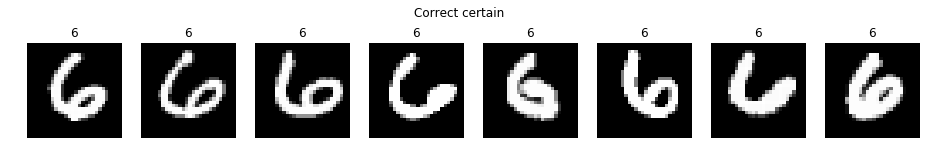

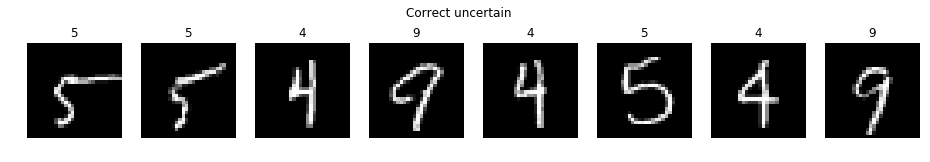

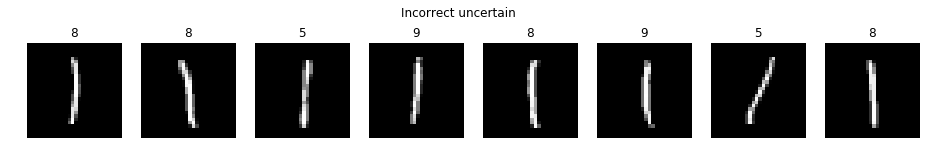

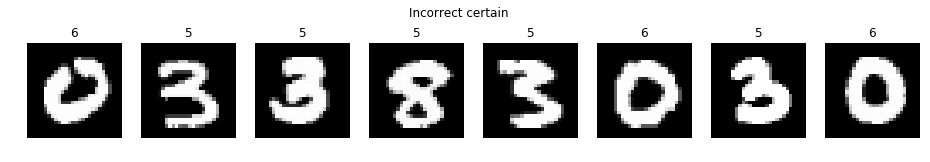

In [136]:
build_train_evaluate_model([
    Flatten(input_shape=(28, 28)),
    Dense(10),
]);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


None

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s - loss: 0.9568 - acc: 0.7600 - val_loss: 0.6101 - val_acc: 0.8480
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 0.4384 - acc: 0.8902 - val_loss: 0.4778 - val_acc: 0.8690
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 0.3526 - acc: 0.9072 - val_loss: 0.4346 - val_acc: 0.8800
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 0.3100 - acc: 0.9166 - val_loss: 0.4106 - val_acc: 0.8800
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 0.2827 - acc: 0.9264 - val_loss: 0.3825 - val_acc: 0.8870
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 0.2609 - acc: 0.9308 - val_loss: 0.3788 - val_acc: 0.8910
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 0.2456 - acc: 0.9326 - val_loss: 0.3716 - val_acc: 0.8860
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 0.2312 - a

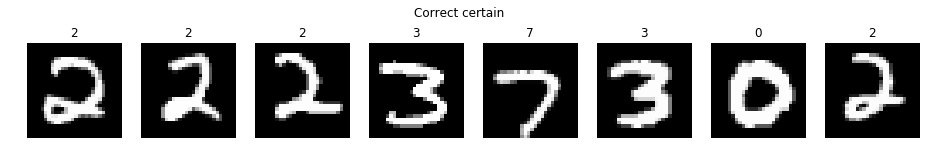

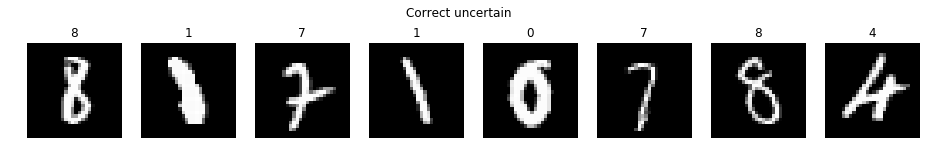

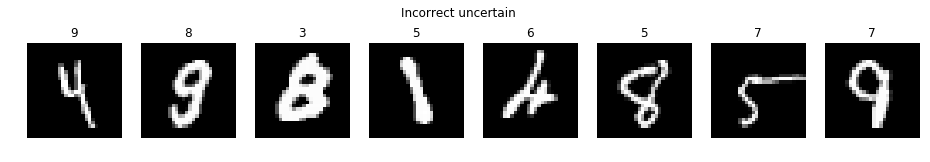

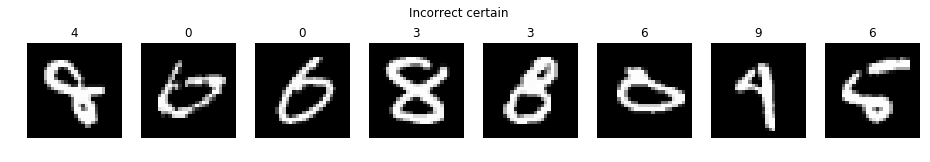

In [138]:
build_train_evaluate_model([
    Flatten(input_shape=(28, 28)),
    Dense(10),
    Activation('softmax'),
]);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


None

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s - loss: 0.5814 - acc: 0.8356 - val_loss: 0.4096 - val_acc: 0.8720
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 0.2390 - acc: 0.9302 - val_loss: 0.4210 - val_acc: 0.8550
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 0.1626 - acc: 0.9568 - val_loss: 0.2854 - val_acc: 0.9120
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 0.1177 - acc: 0.9680 - val_loss: 0.4660 - val_acc: 0.8610
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 0.0862 - acc: 0.9760 - val_loss: 0.2414 - val_acc: 0.9200
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 0.0611 - acc: 0.9864 - val_loss: 0.2309 - val_acc: 0.9250
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 0.0450 - acc: 0.9900 - val_loss: 0.2335 - val_acc: 0.9260
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 0.0306 - a

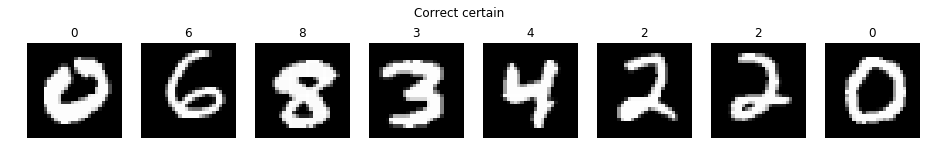

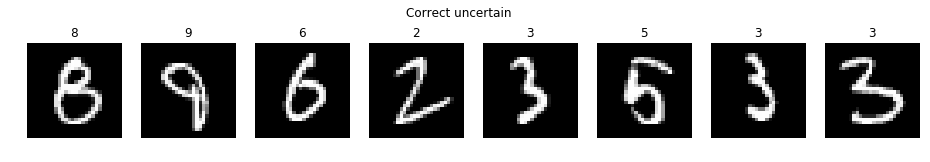

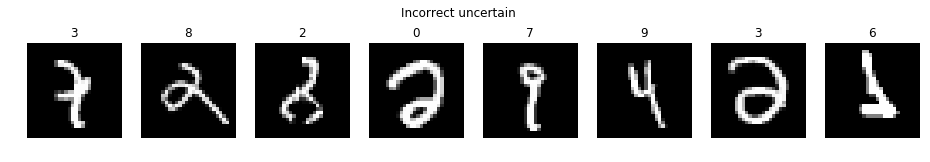

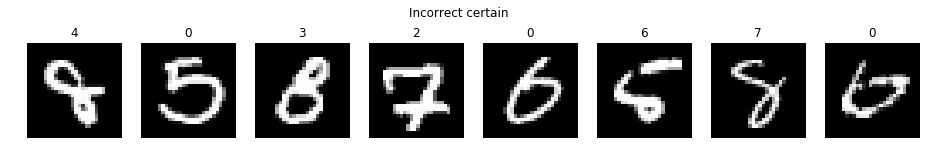

In [153]:
build_train_evaluate_model([
    Flatten(input_shape=(28, 28)),
    
    # hidden layer    
    Dense(100),
    Activation('relu'),
    
    Dense(10),
    Activation('softmax'),
]);

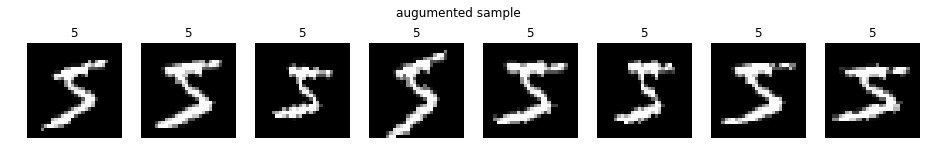

In [208]:
from itertools import islice
from keras.preprocessing.image import ImageDataGenerator 


generator = ImageDataGenerator(
    rotation_range=10.0,
    zoom_range=0.2,
    shear_range=0.2,
)


def augument(x):
    x = np.expand_dims(x, axis=3)
    x = np.stack(generator.random_transform(image) for image in x)
    x = np.squeeze(x, axis=3)
    return x

display_batch(
    augument(np.repeat(x_train[:1], 8, axis=0)), 
    np.repeat(y_train[:1], 8, axis=0), 
    'augumented sample',
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_47 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_48 (Activation)   (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


None

Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 1s - loss: 0.7636 - acc: 0.7700 - val_loss: 0.4094 - val_acc: 0.8760
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.4352 - acc: 0.8682 - val_loss: 0.3654 - val_acc: 0.8890
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.3623 - acc: 0.8932 - val_loss: 0.2884 - val_acc: 0.9200
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.3032 - acc: 0.9068 - val_loss: 0.2706 - val_acc: 0.9110
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.2647 - acc: 0.9196 - val_loss: 0.2485 - val_acc: 0.9240
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.2335 - acc: 0.9254 - val

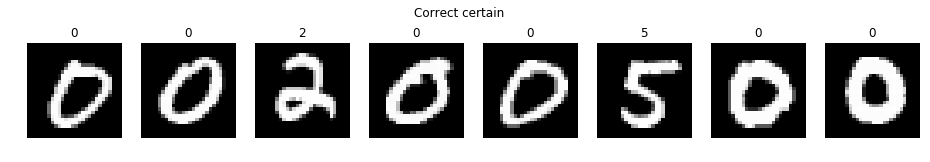

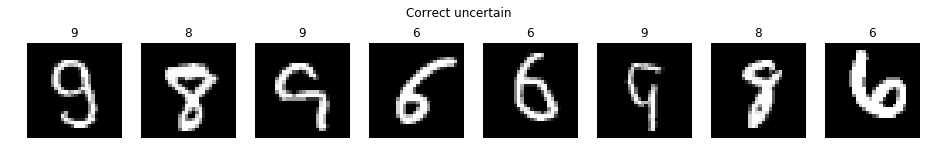

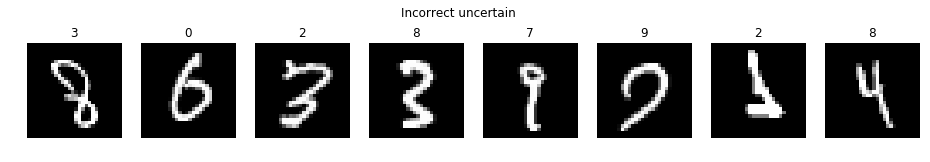

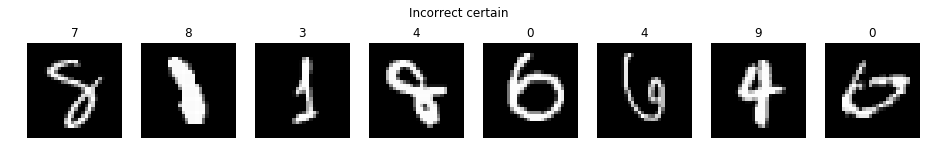

In [209]:
build_train_evaluate_model(
    [
        Flatten(input_shape=(28, 28)),

        # hidden layer    
        Dense(100),
        Activation('relu'),

        Dense(10),
        Activation('softmax'),
    ],
    augument=augument,
);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_54 (Activation)   (None, 100)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_61 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_55 (Activation)   (None, 100)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
__________

None

Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 1s - loss: 0.7186 - acc: 0.7722 - val_loss: 0.5981 - val_acc: 0.8140
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.4030 - acc: 0.8772 - val_loss: 0.4028 - val_acc: 0.8680
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.3314 - acc: 0.8952 - val_loss: 0.2687 - val_acc: 0.8970
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.3105 - acc: 0.9022 - val_loss: 0.2989 - val_acc: 0.8910
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.2575 - acc: 0.9188 - val_loss: 0.2295 - val_acc: 0.9300
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.2429 - acc: 0.9220 - val

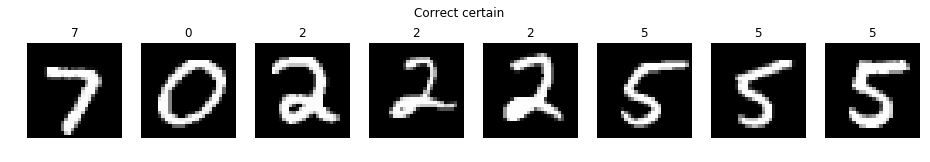

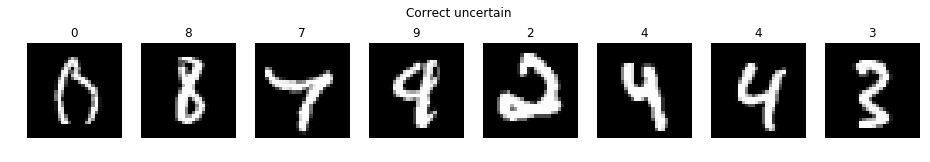

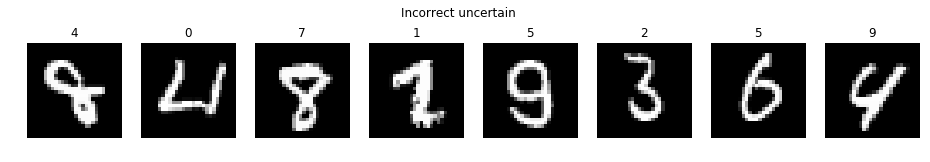

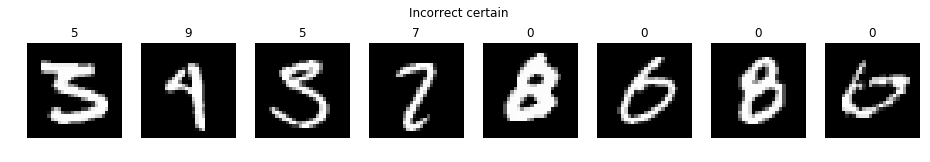

In [212]:
build_train_evaluate_model(
    [
        Flatten(input_shape=(28, 28)),

        Dense(100),
        Activation('relu'),
        BatchNormalization(),
        
        Dense(100),
        Activation('relu'),
        BatchNormalization(),

        Dense(10),
        Activation('softmax'),
    ],
    augument=augument,
);

# Convolutional Models

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_69 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_65 (Dense)             (None, 10)                125450    
_________________________________________________________________
activation_70 (Activation)   (None, 10)                0         
Total params: 125,610
Trainable params: 125,610
Non-trainable params: 0
_________________________________________________________________


None

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 2s - loss: 0.4987 - acc: 0.8600 - val_loss: 0.3354 - val_acc: 0.8930
Epoch 2/10
5000/5000 [==============================] - 2s - loss: 0.1936 - acc: 0.9488 - val_loss: 0.2437 - val_acc: 0.9300
Epoch 3/10
5000/5000 [==============================] - 2s - loss: 0.1125 - acc: 0.9682 - val_loss: 0.2185 - val_acc: 0.9360
Epoch 4/10
5000/5000 [==============================] - 2s - loss: 0.0681 - acc: 0.9830 - val_loss: 0.2190 - val_acc: 0.9420
Epoch 5/10
5000/5000 [==============================] - 2s - loss: 0.0441 - acc: 0.9886 - val_loss: 0.1891 - val_acc: 0.9460
Epoch 6/10
5000/5000 [==============================] - 2s - loss: 0.0268 - acc: 0.9934 - val_loss: 0.2101 - val_acc: 0.9420
Epoch 7/10
5000/5000 [==============================] - 2s - loss: 0.0154 - acc: 0.9984 - val_loss: 0.2109 - val_acc: 0.9440
Epoch 8/10
5000/5000 [==============================] - 2s - loss: 0.0099 - a

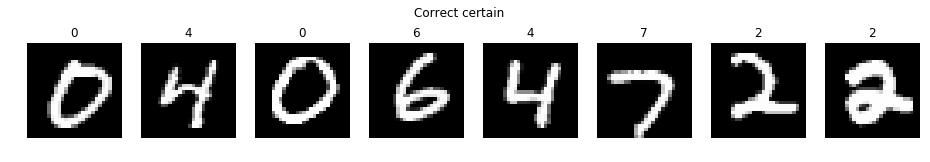

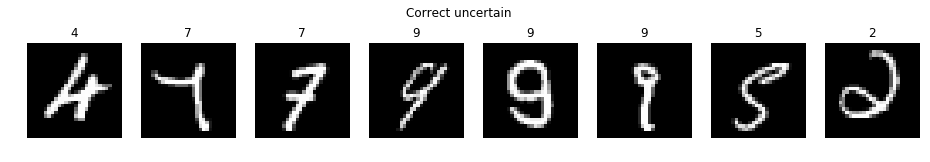

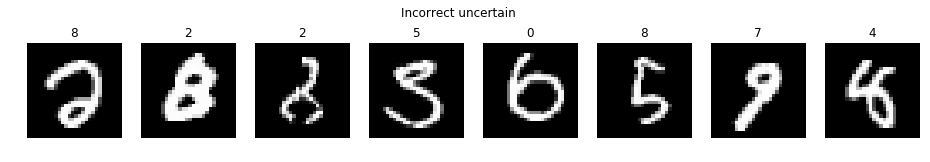

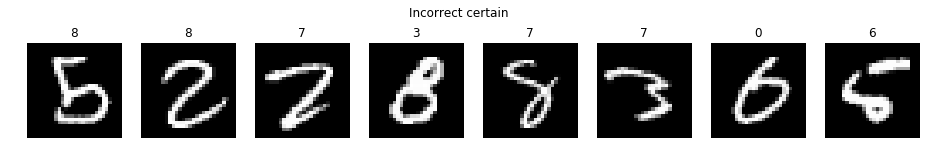

In [223]:
build_train_evaluate_model([
    Reshape((28, 28, 1), input_shape=(28, 28)),
    Conv2D(16, (3, 3), padding='same'),
    Activation('relu'),
    
    Flatten(),
    Dense(10),
    Activation('softmax'),
]);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_71 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
flatten_39 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 10)                125450    
_________________________________________________________________
activation_72 (Activation)   (None, 10)                0         
Total params: 125,610
Trainable params: 125,610
Non-trainable params: 0
_________________________________________________________________


None

Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 2s - loss: 0.6494 - acc: 0.8078 - val_loss: 0.3125 - val_acc: 0.9090
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 2s - loss: 0.3167 - acc: 0.9102 - val_loss: 0.3008 - val_acc: 0.8980
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 2s - loss: 0.2169 - acc: 0.9376 - val_loss: 0.1420 - val_acc: 0.9600
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 2s - loss: 0.1721 - acc: 0.9454 - val_loss: 0.1166 - val_acc: 0.9650
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 2s - loss: 0.1488 - acc: 0.9550 - val_loss: 0.1232 - val_acc: 0.9630
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 2s - loss: 0.1399 - acc: 0.9572 - val

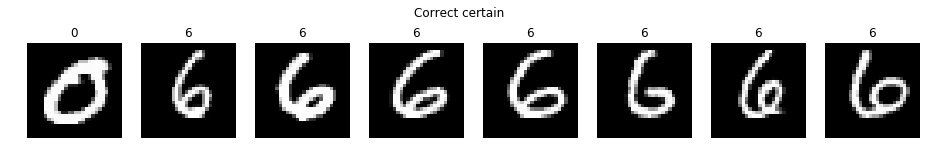

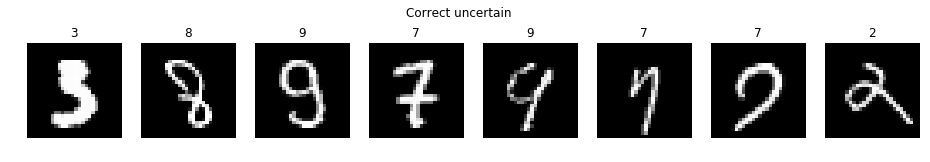

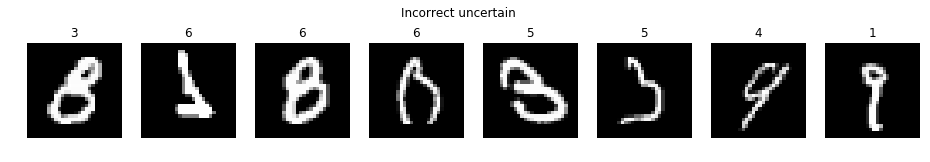

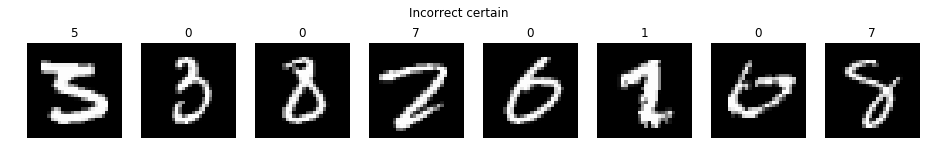

In [224]:
build_train_evaluate_model(
    [
        Reshape((28, 28, 1), input_shape=(28, 28)),
        Conv2D(16, (3, 3), padding='same'),
        Activation('relu'),

        Flatten(),
        Dense(10),
        Activation('softmax'),
    ],
    augument=augument,
);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_28 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 32)        4640      
__________

None

Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 28s - loss: 0.4436 - acc: 0.8630 - val_loss: 3.5824 - val_acc: 0.1270
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 29s - loss: 0.1356 - acc: 0.9606 - val_loss: 2.0582 - val_acc: 0.3910
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 26s - loss: 0.1210 - acc: 0.9634 - val_loss: 0.5170 - val_acc: 0.8400
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 30s - loss: 0.0884 - acc: 0.9734 - val_loss: 0.0968 - val_acc: 0.9690
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 28s - loss: 0.0762 - acc: 0.9756 - val_loss: 0.1159 - val_acc: 0.9600
Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 26s - loss: 0.0749 - acc: 0.9768

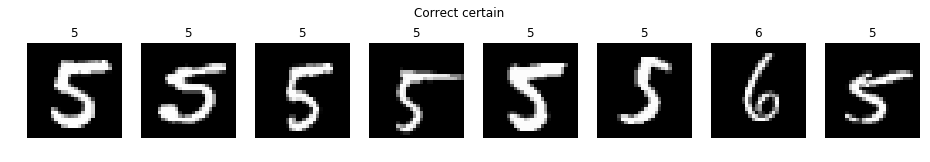

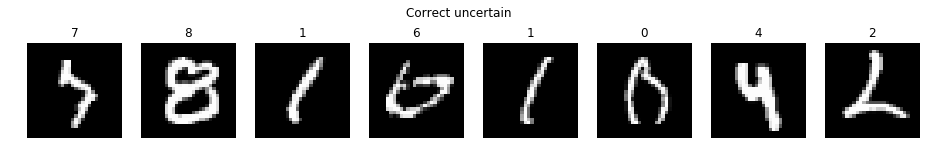

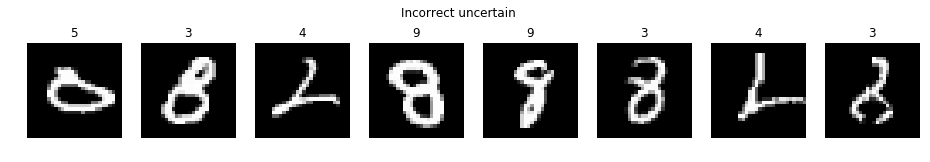

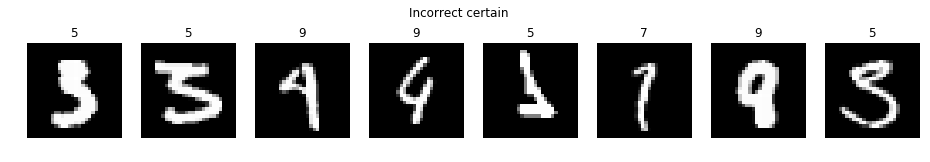

In [230]:
build_train_evaluate_model(
    [
        Reshape((28, 28, 1), input_shape=(28, 28)),
        
        Conv2D(16, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(16, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
        
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
        
        Flatten(),
        
        Dense(100, activation='relu'),
        BatchNormalization(),
        
        Dense(10, activation='softmax'),
    ],
    augument=augument,
);